<a href="https://colab.research.google.com/github/Preetikumari1215/Heart_Disease_Predictor/blob/main/Heart_diseas_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My first ml project on heart disease pridiction


# Enviroment set up

In [51]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"preetikkumari001","key":"170af561253789b66de900136c7e5ff0"}'}

In [52]:
!mkdir -p ~/.kaggle

In [53]:
!cp kaggle.json ~/.kaggle/


In [54]:
!chmod 600 ~/.kaggle/kaggle.json

In [55]:
!pip install kaggle


##downloading dataset from kaggle

In [56]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p/content/heart-disease--unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
heart-disease-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
!ls /content/

 heart_dataset.csv	      heart_scaler.pkl	       'kaggle (2).json'
 heart_disease_rf_model.pkl   heart_user_template.csv   kaggle.json
 heart-disease--unzip	     'kaggle (1).json'	        sample_data


In [59]:
!ls /content/heart-disease--unzip/

heart-disease-data.zip	heart_disease_uci.csv


In [60]:
!unzip /content/heart-disease--unzip/heart-disease-data.zip -d /content/heart-disease--unzip/

Archive:  /content/heart-disease--unzip/heart-disease-data.zip
replace /content/heart-disease--unzip/heart_disease_uci.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

##Expolatory data analysis

In [61]:
import pandas as pd
df = pd.read_csv('/content/heart-disease--unzip/heart_disease_uci.csv')
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [62]:
print (df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [63]:
df.isnull().sum()


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [64]:
numeric_cols=df.select_dtypes(include=['number']).columns
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean())


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

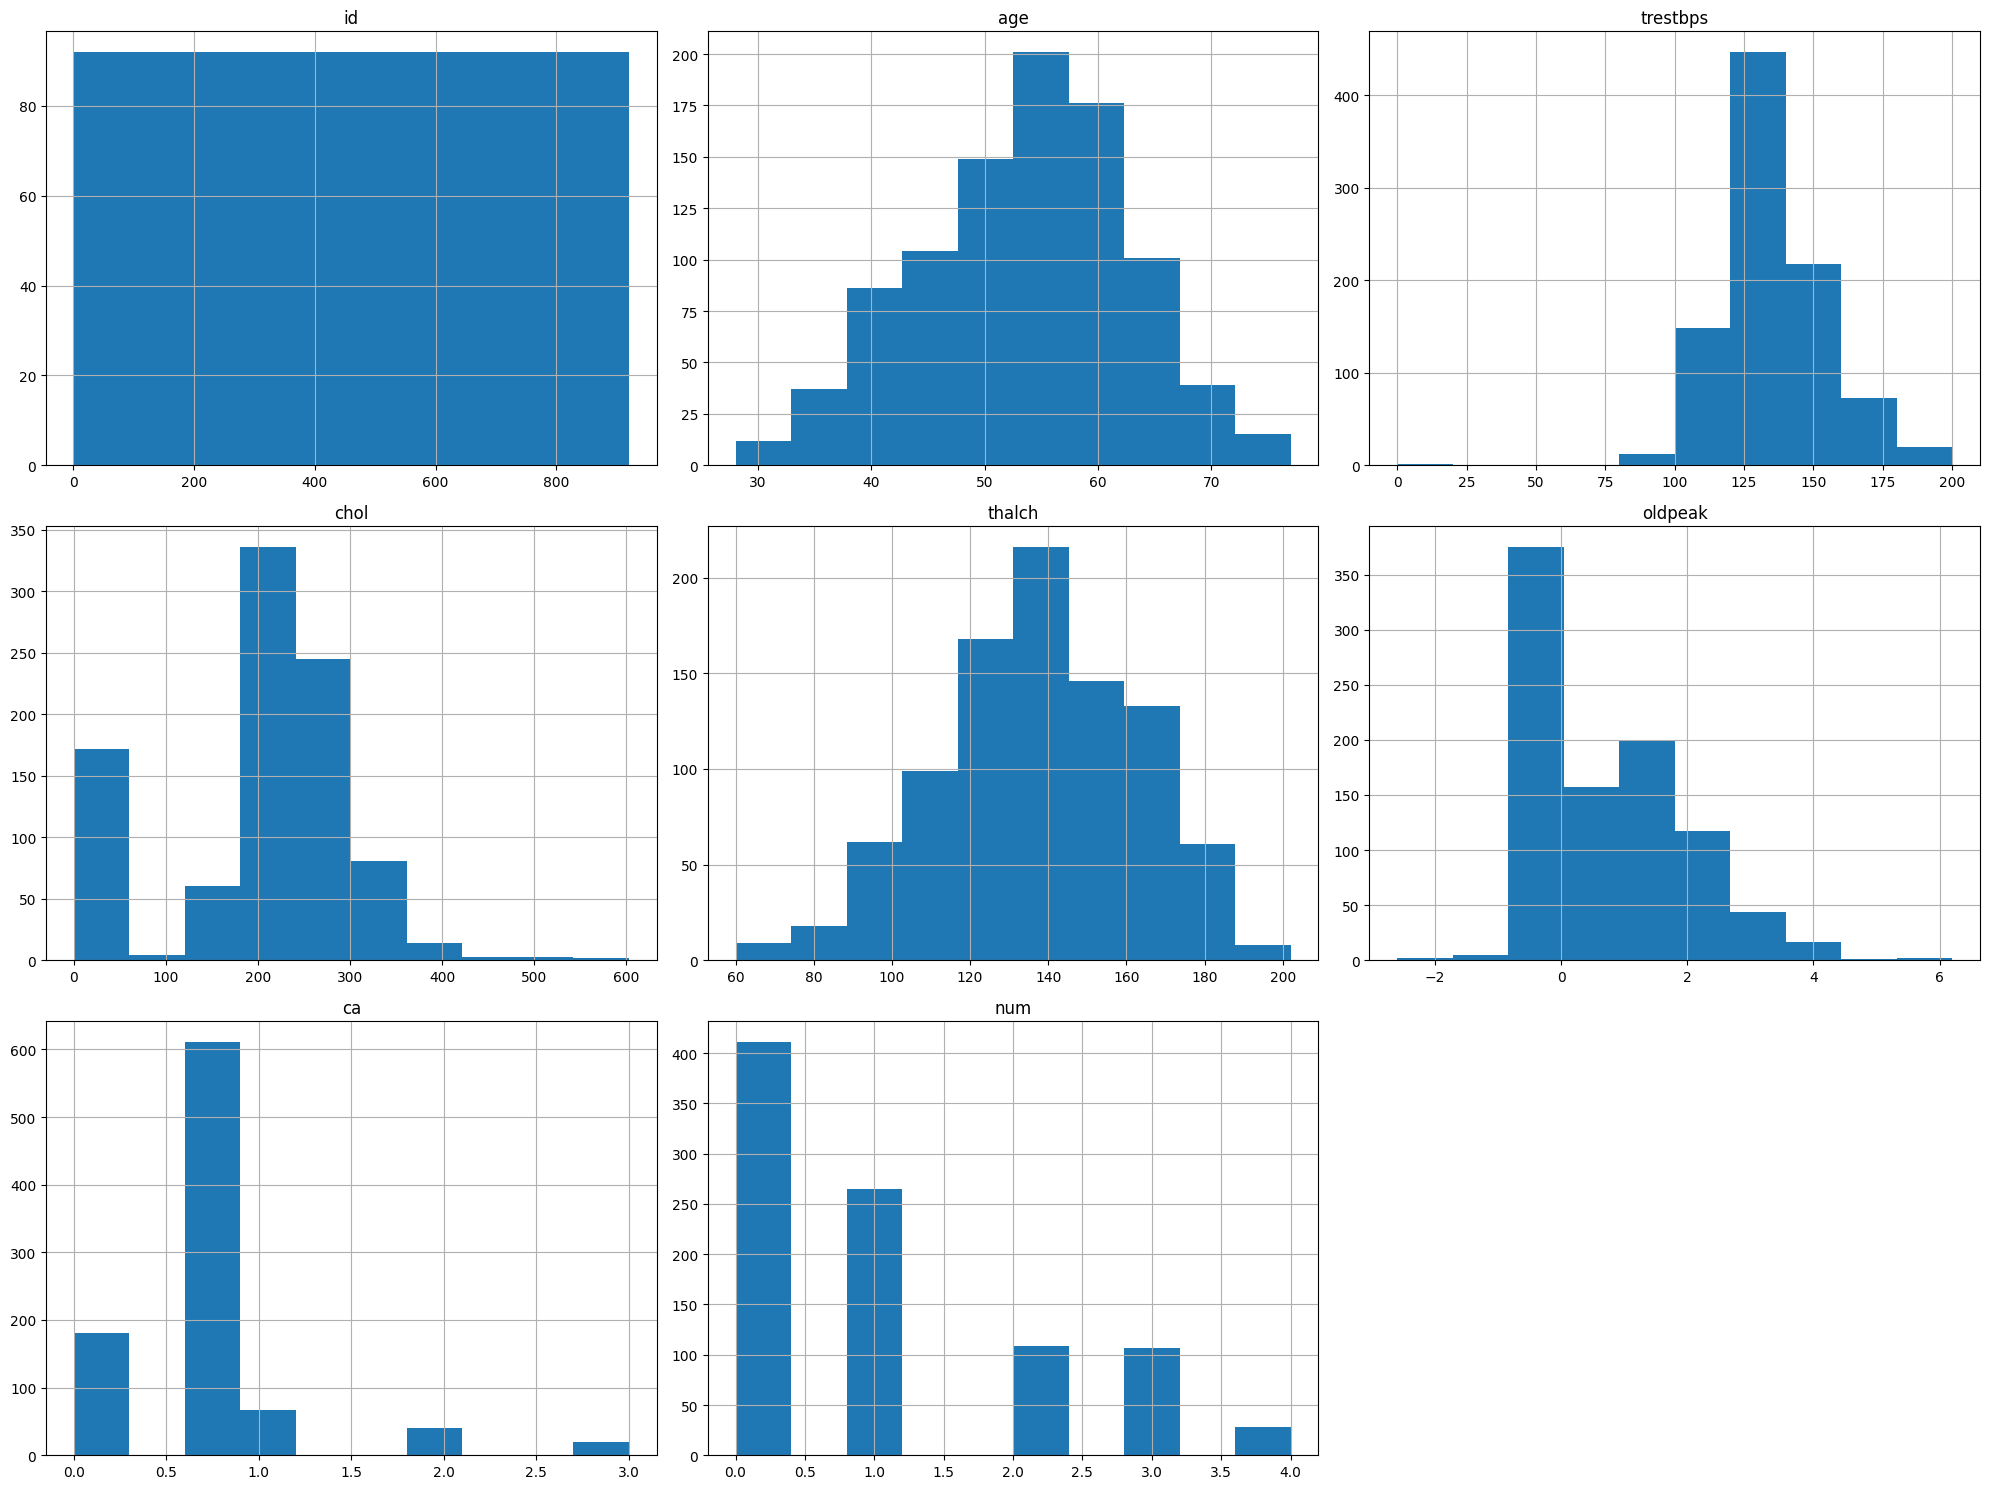

In [66]:
df[numeric_cols].hist(figsize=(20,15))
plt.tight_layout()
plt.show()

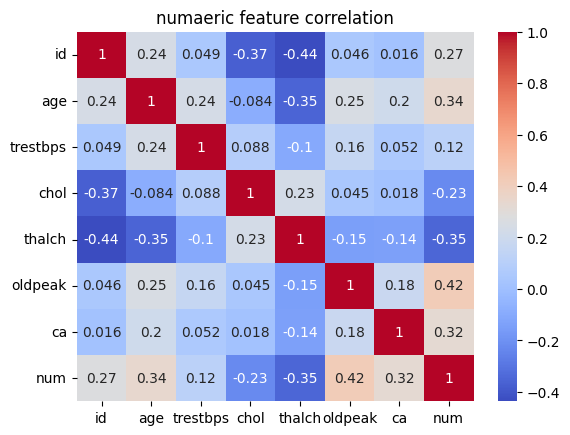

In [67]:
sns.heatmap(df[numeric_cols].corr(),annot=True, cmap="coolwarm")
plt.title('numaeric feature correlation')
plt.show()

In [68]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
if 'num'in cat_cols:
  cat_cols.remove('num')


In [69]:
x=df.drop('num',axis=1)
y=(df['num']>0).astype(int)

In [70]:
x=pd.get_dummies(x,columns=cat_cols)
print('final feature column:',x.columns)

final feature column: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


# Model training

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
sclaer=StandardScaler()
x_train=sclaer.fit_transform(x_train)
x_test=sclaer.transform(x_test)

##logistic regression model

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix as cm

In [74]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)


LogisticRegression()

In [75]:
y_pred_lr=lr_model.predict(x_test)
print('Logistic regression accuracy score:',accuracy_score(y_test,y_pred_lr))

Logistic regression accuracy score: 0.842391304347826


In [76]:
print(classification_report(y_test,y_pred_lr))


              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



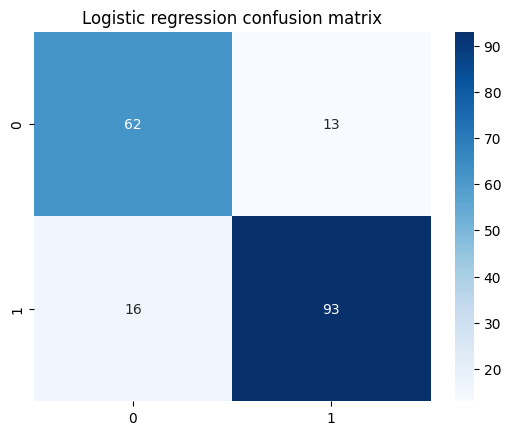

In [77]:
sm=cm(y_test,y_pred_lr)
sns.heatmap(sm,annot=True,fmt='d', cmap="Blues")
plt.title('Logistic regression confusion matrix')
plt.show()

## Decision tree classifer model

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred_dt=dt_model.predict(x_test)
print('Decision tree accuracy score:',accuracy_score(y_test,y_pred_dt))

Decision tree accuracy score: 0.7934782608695652


In [80]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        75
           1       0.87      0.76      0.81       109

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.81      0.79      0.80       184



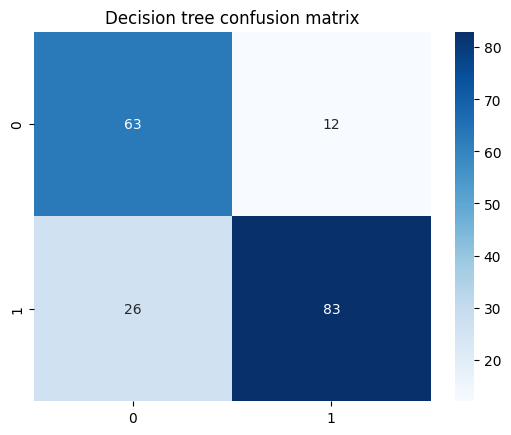

In [81]:
dt=cm(y_test,y_pred_dt)
sns.heatmap(dt,annot=True,fmt='d', cmap="Blues")
plt.title('Decision tree confusion matrix')
plt.show()

## RandomForestClassifier model

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [83]:
y_pre_rf=rf_model.predict(x_test)
print('Random forest accuracy score:',accuracy_score(y_test,y_pre_rf))

Random forest accuracy score: 0.8858695652173914


In [84]:
print(classification_report(y_test,y_pre_rf))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.92      0.89      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



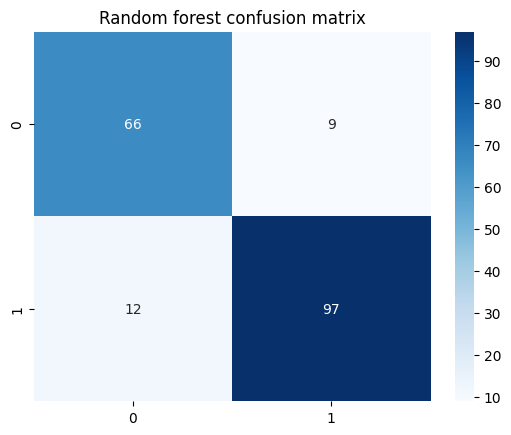

In [85]:
rf=cm(y_test,y_pre_rf)
sns.heatmap(rf,annot=True,fmt='d', cmap="Blues")
plt.title('Random forest confusion matrix')
plt.show()


<Axes: xlabel='None', ylabel='None'>

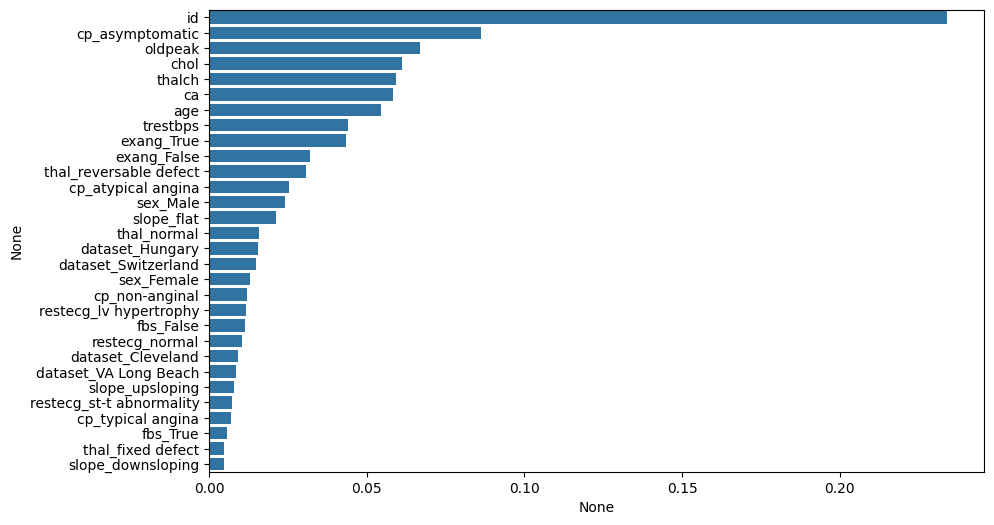

In [86]:
feat_imp=pd.Series(rf_model.feature_importances_,index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp,y=feat_imp.index)

# model testing

In [87]:
import joblib
joblib.dump(rf_model,'heart_disease_rf_model.pkl')
joblib.dump(sclaer,'heart_scaler.pkl')

['heart_scaler.pkl']

In [88]:
sample = x.head(1)
sample.to_csv('heart_user_template.csv', index=False)
print('user tamplate saved as:heart_user_template.csv')

user tamplate saved as:heart_user_template.csv


In [89]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset (1).csv


{'heart_dataset (1).csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\n58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1\n67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0\n42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0\n50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0\n45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0\n'}

## model output

In [90]:
import pandas as pd
import joblib
user_df=pd.read_csv('heart_dataset.csv')
numeric_cols=user_df.select_dtypes(include=['number']).columns.tolist()
cat_cols=user_df.select_dtypes(include=['object']).columns.tolist()
bool_cols=user_df.select_dtypes(include=['bool']).columns.tolist()

numeric_cols=[col for col in numeric_cols if col in user_df.columns]
cat_cols=[col for col in cat_cols if col in user_df.columns]
bool_cols=[col for col in bool_cols if col in user_df.columns]

user_df[numeric_cols]=user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
  user_df[col]=user_df[col].fillna("unknown")

for col in bool_cols:
  user_df[col]=user_df[col].astype(int)

user_df_encoded=pd.get_dummies(user_df,columns=cat_cols)
user_df_encoded=user_df_encoded.reindex(columns=x.columns,fill_value=0)

scaler=joblib.load('heart_scaler.pkl')
user_df_scaled=scaler.transform(user_df_encoded)

model=joblib.load('heart_disease_rf_model.pkl')
prediction=model.predict(user_df_scaled)

user_df['heart_disease_prediction']=prediction

print(user_df)


   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150      0      1.4   
1   67       160   276    0  lv hypertrophy     108      1      1.5   
2   42       120   230    0          normal     170      0      1.0   
3   50       130   210    0  lv hypertrophy     158      0      0.8   
4   45       114   230    0          normal     165      0      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           